In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
NUM_SQUARES = 200
X_train = []
for i in range(NUM_SQUARES):
    exp =np.zeros((28, 28))
    x_start = randint(0,27)
    x_end = randint(x_start, 28)
    y_start = randint(0, 27)
    y_end = randint(y_start, 28)
    for x in range(y_start, y_end):
        for y in range(y_start, y_end):
            exp[x, y] = 1
    if randint(0, 1) == 0: # sometie true
        exp = np.fliplr(exp)
    X_train.append(exp)

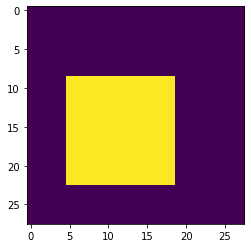

In [24]:
plt.imshow(X_train[1])

In [25]:
for i in range(NUM_SQUARES):
    x = np.arange(0, 28)
    y = np.arange(0, 28)
    arr = np.zeros((y.size, x.size))

    cx = randint(0, 28)
    cy = randint(0, 28)
    r = randint(0, 14)

    # The two lines below could be merged, but I stored the mask
    # for code clarity.
    mask = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
    arr[mask] = 1
    if randint(0, 1) == 0: # sometie true
        arr = np.fliplr(arr)
    X_train.append(arr)
    


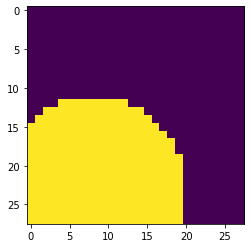

In [26]:
plt.imshow(X_train[300])

In [27]:
X_train = np.array(X_train)
X_train.shape

(400, 28, 28)

In [28]:
Y_train = np.array([1 if i<200 else 0 for i in range(400)])
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
shuffler = np.random.permutation(NUM_SQUARES*2)
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]

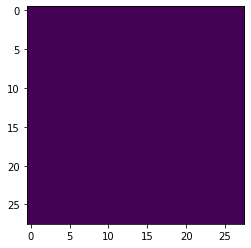

In [30]:
plt.imshow(X_train[100])

In [31]:
label = Y_train[100]
if label == 0:
    print('circle!')
else:
    print('Square!')

circle!


In [32]:
# make training and testing data
NUM_TRAIN =360
X_test = X_train[NUM_TRAIN:]
Y_test = Y_train[NUM_TRAIN:]
X_train = X_train[:NUM_TRAIN]
Y_train = Y_train[:NUM_TRAIN]

In [33]:
X_train.shape

(360, 28, 28)

In [34]:
# flatten 
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [35]:
X_train_flattened.shape

(360, 784)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
12/12 [==============================] - 0s 907us/step - loss: 0.6670 - accuracy: 0.5500
Epoch 2/5
12/12 [==============================] - 0s 816us/step - loss: 0.5864 - accuracy: 0.6833
Epoch 3/5
12/12 [==============================] - 0s 897us/step - loss: 0.5508 - accuracy: 0.7056
Epoch 4/5
12/12 [==============================] - 0s 907us/step - loss: 0.5216 - accuracy: 0.7472
Epoch 5/5
12/12 [==============================] - 0s 997us/step - loss: 0.5076 - accuracy: 0.7722


In [37]:
y_predicted = model.predict(X_test_flattened)

In [38]:
np.argmax(y_predicted[7])

1

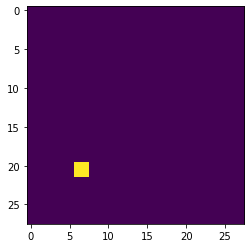

In [39]:
plt.imshow(X_test[7])

In [40]:
# addign a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
12/12 [==============================] - ETA: 1s - loss: 0.7866 - accuracy: 0.46 - 0s 1ms/step - loss: 0.6348 - accuracy: 0.6500
Epoch 2/5
12/12 [==============================] - 0s 1ms/step - loss: 0.4745 - accuracy: 0.8167
Epoch 3/5
12/12 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.8361
Epoch 4/5
12/12 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8417
Epoch 5/5
12/12 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8722


In [41]:
# addign a hidden layer
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
12/12 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.6861
Epoch 2/5
12/12 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.8333
Epoch 3/5
12/12 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8583
Epoch 4/5
12/12 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8889
Epoch 5/5
12/12 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8889


In [42]:
# addign a hidden layer
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=20)

Epoch 1/20
12/12 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.6333
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8194
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8139
Epoch 4/20
12/12 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8667
Epoch 5/20
12/12 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.8944
Epoch 6/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.8972
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9306
Epoch 8/20
12/12 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.9250
Epoch 9/20
12/12 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.9444
Epoch 10/20
12/12 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9500
Epoch 11/20
12/12 [